In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
df.drop(columns=['Person ID' , 'Occupation'], inplace=True)
df

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# Preprocessing

### Handling missing values

In [4]:
df.isna().sum()

Gender                     0
Age                        0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Sleep Duration           374 non-null    float64
 3   Quality of Sleep         374 non-null    int64  
 4   Physical Activity Level  374 non-null    int64  
 5   Stress Level             374 non-null    int64  
 6   BMI Category             374 non-null    object 
 7   Blood Pressure           374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 32.3+ KB


In [6]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [7]:
df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

### remove duplicates

In [8]:
df.duplicated()

0      False
1      False
2       True
3      False
4       True
       ...  
369     True
370     True
371     True
372     True
373     True
Length: 374, dtype: bool

In [9]:
df.drop_duplicates(inplace=True)
df1 = df.reset_index(drop=True)
df1

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
3,Male,28,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
4,Male,29,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...
125,Female,59,8.0,9,75,3,Overweight,140/95,68,7000,None
126,Female,59,8.1,9,75,3,Overweight,140/95,68,7000,None
127,Female,59,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
128,Female,59,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### Encoding the categorical data

In [10]:
from sklearn.preprocessing import LabelEncoder  

label_encoder_Gender = LabelEncoder() 
label_encoder_BMI_Category = LabelEncoder()  
label_encoder_sleep_disorder = LabelEncoder()  

df['Gender'] = label_encoder_Gender.fit_transform(df1['Gender']) 
df['BMI Category'] = label_encoder_BMI_Category.fit_transform(df1['BMI Category']) 
df['Sleep Disorder'] = label_encoder_sleep_disorder.fit_transform(df1['Sleep Disorder']) 

In [11]:
df1 = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)

df1=df1.rename(columns={0: 'BloodPressure_high', 1: 'BloodPressure_low'})

df1['BloodPressure_high'] = df1['BloodPressure_high'].astype(int)
df1['BloodPressure_low'] = df1['BloodPressure_low'].astype(int)

df1 = df1.reset_index(drop=True)
df1

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_high,BloodPressure_low
0,1,27,6.1,6,42,6,3,77,4200,1,126,83
1,1,28,6.2,6,60,8,0,75,10000,1,125,80
2,1,28,5.9,4,30,8,2,85,3000,2,140,90
3,1,28,5.9,4,30,8,2,85,3000,0,140,90
4,1,29,6.3,6,40,7,2,82,3500,0,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,59,8.0,9,75,3,3,68,7000,1,140,95
126,0,59,8.1,9,75,3,3,68,7000,1,140,95
127,0,59,8.2,9,75,3,3,68,7000,2,140,95
128,0,59,8.0,9,75,3,3,68,7000,2,140,95


### Identifying outliers

In [12]:
df1.dtypes

Gender                       int32
Age                          int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                 int32
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder               int32
BloodPressure_high           int32
BloodPressure_low            int32
dtype: object

In [13]:
df1['Quality of Sleep'].unique()

array([6, 4, 7, 5, 8, 9], dtype=int64)

In [14]:
df1['BloodPressure_high'].unique()

array([126, 125, 140, 120, 132, 130, 117, 118, 128, 131, 115, 135, 129,
       119, 121, 122, 142, 139])

In [15]:
df1['BloodPressure_low'].unique()

array([83, 80, 90, 87, 86, 76, 85, 84, 75, 88, 78, 77, 79, 82, 92, 95, 91])

In [16]:
lower_limit_qos = df1['Quality of Sleep'].mean() - 3*df1['Quality of Sleep'].std()
upper_limit_qos = df1['Quality of Sleep'].mean() + 3*df1['Quality of Sleep'].std()

print(lower_limit_qos , upper_limit_qos)


lower_limit_BloodPressure_high   = df1['BloodPressure_high'].mean() - 3*df1['BloodPressure_high'].std()
upper_limit_BloodPressure_high   = df1['BloodPressure_high'].mean() + 3*df1['BloodPressure_high'].std()

print(lower_limit_BloodPressure_high , upper_limit_BloodPressure_high )

lower_limit_BloodPressure_low  = df1['BloodPressure_low'].mean() - 3*df1['BloodPressure_low'].std()
upper_limit_BloodPressure_low   = df1['BloodPressure_low'].mean() + 3*df1['BloodPressure_low'].std()

print(lower_limit_BloodPressure_low , upper_limit_BloodPressure_low)

3.3152670963232445 10.961655980599833
105.45192085027418 151.68654068818734
66.7504932418839 102.61873752734687


It doesn't have any outliers

### Vitualization

In [17]:
name_col=['Age', 'Sleep Duration', 'Quality of Sleep', 
       'Physical Activity Level', 'Stress Level',
       'Heart Rate', 'Daily Steps','BloodPressure_high', 'BloodPressure_low']



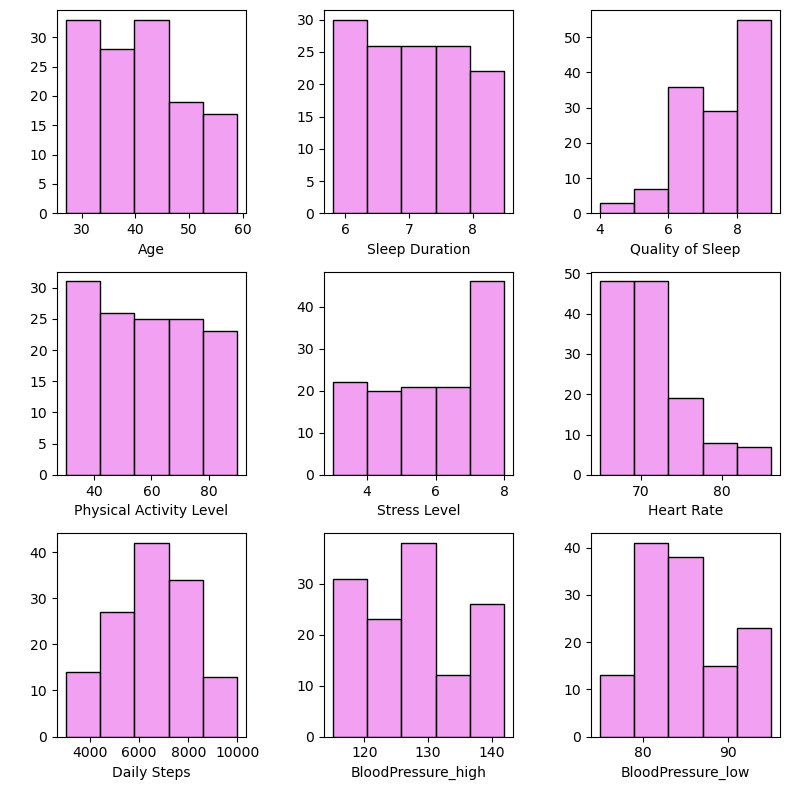

In [18]:
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
plt.subplots_adjust(wspace=0.8, hspace=0.8)

for i, cat in enumerate(name_col):
    sns.histplot(df1[cat], bins=5, color='violet', ax=axs[int(i/3), i%3]).set_ylabel(" ")
    
fig.tight_layout()
plt.show()

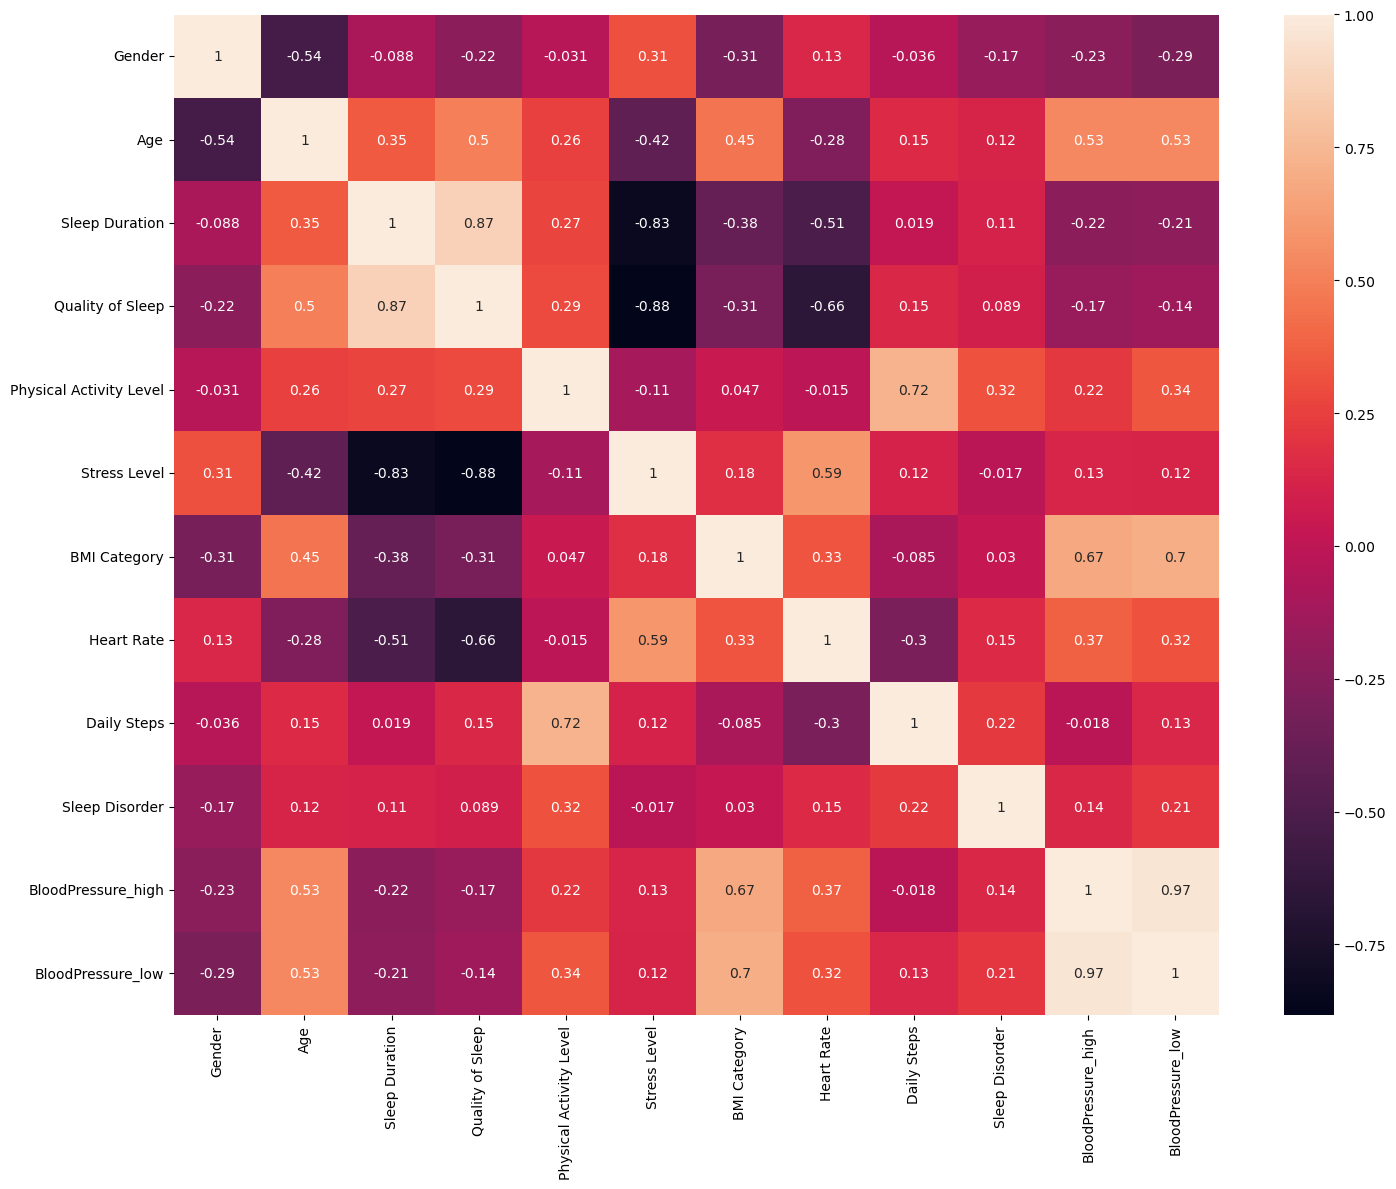

In [19]:
fig, axs = plt.subplots(figsize=(15, 12))
sns.heatmap(df1.corr(numeric_only=True), annot=True)
fig.tight_layout()

In [20]:
df1.groupby('Quality of Sleep').aggregate(['min', np.median, 'max', np.var]).stack()

Gender        Age  Sleep Duration  \
Quality of Sleep                                               
4                min     0.000000  28.000000        5.800000   
                 median  1.000000  28.000000        5.900000   
                 max     1.000000  34.000000        5.900000   
                 var     0.333333  12.000000        0.003333   
5                min     0.000000  29.000000        6.400000   
                 median  0.000000  30.000000        6.500000   
                 max     1.000000  39.000000        6.600000   
                 var     0.285714  17.238095        0.006667   
6                min     0.000000  27.000000        5.900000   
                 median  1.000000  43.000000        6.100000   
                 max     1.000000  51.000000        6.900000   
                 var     0.244444  67.168254        0.054159   
7                min     0.000000  29.000000        6.500000   
                 median  1.000000  39.000000        7.100000   
                 max     1.000000  52.000000        7.900000   
                 var     0.256158  58.881773        0.251502   
8                min     0.000000  31.000000        7.100000   
                 median  1.000000  38.000000        7.300000   
                 max     1.000000  43.000000        7.900000   
                 var     0.217803  11.359848        0.074678   
9                min     0.000000  39.000000        8.000000   
                 median  0.000000  54.500000        8.200000   
                 max     1.000000  59.000000        8.500000   
                 var     0.045455  21.575758        0.030130   

                         Physical Activity Level  Stress Level  BMI Category  \
Quality of Sleep                                                               
4                min                   30.000000      8.000000      2.000000   
                 median                30.000000      8.000000      2.000000   
                 max                   32.000000      8.000000      3.000000   
                 var                    1.333333      0.000000      0.333333   
5                min                   35.000000      7.000000      1.000000   
                 median                35.000000      7.000000      1.000000   
                 max                   40.000000      7.000000      3.000000   
                 var                    7.142857      0.000000      1.142857   
6                min                   30.000000      6.000000      0.000000   
                 median                45.000000      8.000000      3.000000   
                 max                   90.000000      8.000000      3.000000   
                 var                  593.532540      0.428571      1.850000   
7                min                   30.000000      4.000000      0.000000   
                 median                55.000000      6.000000      2.000000   
                 max                   75.000000      7.000000      3.000000   
                 var                  212.315271      0.901478      1.958128   
8                min                   45.000000      3.000000      0.000000   
                 median                60.000000      5.000000      0.000000   
                 max                   90.000000      6.000000      3.000000   
                 var                  204.734848      0.488636      0.405303   
9                min                   30.000000      3.000000      0.000000   
                 median                75.000000      3.000000      1.500000   
                 max                   90.000000      4.000000      3.000000   
                 var                  580.140693      0.045455      2.069264   

                         Heart Rate   Daily Steps  Sleep Disorder  \
Quality of Sleep                                                    
4                min      81.000000  3.000000e+03        0.000000   
                 median   85.000000  3.000000e+03        2.000000   
     

# Transforming the dataset

### Normalization

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  
norm_df = scaler.fit_transform(df1) 
norm_df

array([[1.        , 0.        , 0.11111111, ..., 0.5       , 0.40740741,
        0.4       ],
       [1.        , 0.03125   , 0.14814815, ..., 0.5       , 0.37037037,
        0.25      ],
       [1.        , 0.03125   , 0.03703704, ..., 1.        , 0.92592593,
        0.75      ],
       ...,
       [0.        , 1.        , 0.88888889, ..., 1.        , 0.92592593,
        1.        ],
       [0.        , 1.        , 0.81481481, ..., 1.        , 0.92592593,
        1.        ],
       [0.        , 1.        , 0.85185185, ..., 1.        , 0.92592593,
        1.        ]])

### Dimension reduction

#### PCA

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df1)
df_pca = pca.transform(df1)
df_pca

array([[ 2.43237370e+03, -3.24845794e-01],
       [-3.36757132e+03, -2.93381339e+01],
       [ 3.63243479e+03,  5.04491809e+00],
       [ 3.63243496e+03,  5.02329124e+00],
       [ 3.13236590e+03,  1.00662992e+01],
       [-1.36777327e+03, -2.76120878e+00],
       [-1.36739701e+03, -4.23745704e+01],
       [-1.36739701e+03, -4.23760312e+01],
       [ 2.63238269e+03,  2.92869113e+00],
       [-1.36739709e+03, -4.23652178e+01],
       [ 2.63238286e+03,  2.90706428e+00],
       [-1.36777401e+03, -2.50549434e+00],
       [-1.36777401e+03, -2.50403361e+00],
       [-1.36777401e+03, -2.50257287e+00],
       [-1.36777401e+03, -2.50111213e+00],
       [ 2.53242600e+03, -3.00509685e+00],
       [ 2.53242617e+03, -3.02672371e+00],
       [-1.67816680e+02,  4.94508991e+00],
       [ 1.63249642e+03, -1.75349563e+01],
       [-1.36777475e+03, -2.24539769e+00],
       [-1.36777475e+03, -2.24685843e+00],
       [-1.36777475e+03, -2.24393695e+00],
       [-1.36777483e+03, -2.23458426e+00],
       [-1.

In [23]:
pca.explained_variance_ratio_

array([9.99872189e-01, 7.43475569e-05])

### Train test split

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import utils

label_encoder = LabelEncoder()
train_y = label_encoder.fit_transform(norm_df[:, 2])

X_train, X_test, y_train, y_test = train_test_split(
                                                    norm_df[:, [1,5,7]], 
                                                    train_y, 
                                                    test_size=0.2, 
                                                    random_state=42)


# print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (104, 3) (104,)
Testing set shape: (26, 3) (26,)


### Model selection

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)

# train the model on the training set
knn.fit(X_train, y_train)

# predict the labels of the test set
y_pred = knn.predict(X_test)


In [31]:
from sklearn import metrics

In [32]:
Ks = 10
acc = np.zeros((Ks-1))
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    acc[n-1] = metrics.accuracy_score(y_test, yhat)

acc

array([0.30769231, 0.19230769, 0.11538462, 0.19230769, 0.15384615,
       0.15384615, 0.07692308, 0.07692308, 0.07692308])

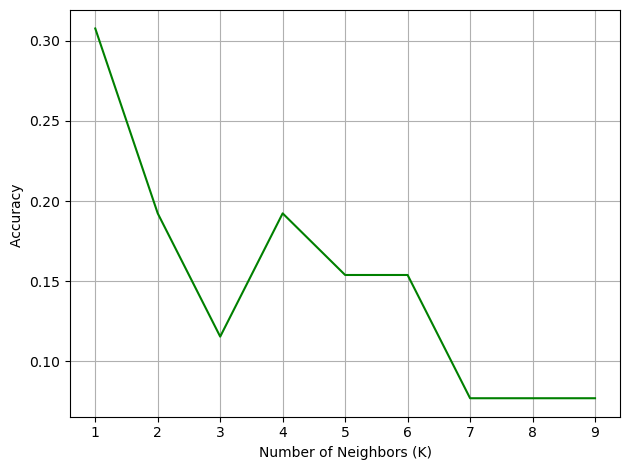

In [29]:
plt.plot(range(1,Ks),acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.grid()
plt.show()

#### Evaluation

##### Jaccard

In [33]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 19.23%


##### SVM

In [34]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf') # Other kernels: linear, poly and sigmoid

# Fit the SVM model to the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.23076923076923078


##### Random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Fit the Random Forest model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.34615384615384615


##### Decision tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

# Fit the Decision Tree model to the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.2692307692307692


##### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# Fit the Logistic Regression model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.19230769230769232


##### Naive bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.2692307692307692


In [39]:
from sklearn.pipeline import Pipeline

In [40]:
pipe = Pipeline([('pca' , PCA()),
                 ('tree' , DecisionTreeClassifier())])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.2692307692307692
